## Import relevant libraries and load dataset.

In [1]:
# import libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import  roc_auc_score,auc,roc_curve
import matplotlib.pyplot as plt

In [2]:
# load train.csv into pandas dataframe
train_df = pd.read_csv("train.csv")
# print the first 5 rows
train_df.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [3]:
# load test.csv into pandas dataframe
test_df = pd.read_csv("test.csv")
# print the first 5 rows
test_df.head()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


In [4]:
# load final_submission.csv into pandas dataframe
sample = pd.read_csv("single_datapoint_submission.csv")
# print the first 5 rows
sample.head()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,267,1.092,-0.635,-1.253,-1.998,0.922,0.512,-0.819,-1.463,-1.533,...,1.693,-0.067,1.011,-0.011,0.343,-0.059,-2.163,0.311,1.62,-0.134


In [5]:
# how many datapoints and features present in train and test dataset
print("Training Dataset                      :",train_df.shape)
print("Test Dataset                          :",test_df.shape)
print("Sample Dataset with a single datapoint:",sample.shape)

Training Dataset                      : (250, 302)
Test Dataset                          : (19750, 301)
Sample Dataset with a single datapoint: (1, 301)


In [6]:
y = train_df["target"].values # store values of feature "target"
X = train_df.drop(["id","target"],axis=1) # drop id and class label from the dataset
test = test_df.drop("id",axis=1) # drop id from the test dataset
sample = sample.drop(['id'],axis=1) # drop id from the test dataset

## Featurization and Feature Engineering

In [7]:
def preprocessing(df):
    """
    This function performes feature engineering and adds new statistical features to the df dataframe
    """
    if "id" and "target" in df:
        data = df.drop(["id","target"],axis=1)
    else:
        data = df
    
    # compute arithmetic mean along axis 1 (row wise)
    df_mean = np.mean(data,axis=1)
    # compute standard deviation along axis 1 (row wise)
    df_std = np.std(data,axis=1)
    
    # compute 25th quantile along axis 1 (row wise)
    df_quantile25 = np.quantile(data,0.25,axis=1)
    # compute 50th quantile along axis 1 (row wise)
    df_quantile50 = np.quantile(data,0.50,axis=1)
    # compute 75th quantile along axis 1 (row wise)
    df_quantile75 = np.quantile(data,0.75,axis=1)
    
    # compute trigonometric sine, element-wise then take mean of each row.
    sine = np.sin(data)
    df_sine = np.mean(sine,axis=1)
    # compute trigonometric cosine, element-wise then take mean of each row.
    cosine = np.cos(data)
    df_cosine = np.mean(cosine,axis=1)
    # compute trigonometric tangent, element-wise then take mean of each row.
    tangent = np.tan(data)
    df_tangent = np.mean(tangent,axis=1)
    # compute trignometric inverse sine, element-wise then take mean of each row.
    inversesine = np.arcsin(data)
    df_inversesine = np.mean(inversesine,axis=1)
    # compute trigonometric inverse cosine, element-wise then take mean of each row.
    inversecosine = np.arccos(data)
    df_inversecosine = np.mean(inversecosine,axis=1)
    # compute trigonometric inverse tangent, element-wise then take mean of each row.
    inversetangent = np.arctan(data)
    df_inversetangent = np.mean(inversetangent,axis=1)
    
    # compute hyperbolic sine, element-wise then take mean of each row.
    hyperbolicsine = np.sinh(data)
    df_hyperbolicsine = np.mean(hyperbolicsine,axis=1)
    # compute hyperbolic cosine, element-wise then take mean of each row.
    hyperboliccosine = np.cosh(data)
    df_hyperboliccosine = np.mean(hyperboliccosine,axis=1)
    # compute hyperbolic tangent, element-wise then take mean of each row.
    hyperbolictangent = np.tanh(data)
    df_hyperbolictangent = np.mean(hyperbolictangent,axis=1)
    
    # compute exponential, element-wise then take mean of each row.
    exponential = np.exp(data)
    df_exponential = np.mean(exponential,axis=1)
    # compute natural logarithm, element-wise then take mean of each row.
    expm1 = np.expm1(data)
    df_expm1 = np.mean(expm1,axis=1)
    # compute 2**p for all p in the input array, element-wise then take mean of each row.
    exp2 = np.exp2(data)
    df_exp2 = np.mean(exp2,axis=1)
    
    # compute array elements raise to the power of 2, element-wise then take mean of each row.
    poweroftwo = np.power(data,2)
    df_poweroftwo = np.mean(poweroftwo,axis=1)
    # compute array elements raise to the power of 3, element-wise then take mean of each row.
    powerofthree = np.power(data,3)
    df_powerofthree = np.mean(powerofthree,axis=1)
    # compute array elements raise to the power of 4, element-wise then take mean of each row.
    poweroffour = np.power(data,4)
    df_poweroffour = np.mean(poweroffour,axis=1)
    
    # add various new statistical features to df dataset
    df['mean'] = df_mean
    df['std'] = df_std
    
    df["quantile25"] = df_quantile25
    df["quantile50"] = df_quantile50
    df["quantile75"] = df_quantile75
    
    df['sine'] = df_sine
    df['cosine'] = df_cosine
    df['tangent'] = df_tangent
    df['inversesine'] = df_inversesine
    df['inversecosine'] = df_inversecosine
    df['inversetangent'] = df_inversetangent
    
    df['hyperbolicsine'] = df_hyperbolicsine
    df['hyperboliccosine'] = df_hyperboliccosine
    df['hyperbolictangent'] = df_hyperbolictangent
    
    df['exponential'] = df_exponential
    df['exponentialm1'] = df_expm1
    df["exponential2"] = df_exp2
    
    df['poweroftwo'] = df_poweroftwo
    df['powerofthree'] = df_powerofthree
    df['poweroffour'] = df_poweroffour
    return df

## Function-1

In [8]:
def final_fun_1(X):
    """
    This function includes the entire pipeline, from data preprocessing to making final predictions.
    Input : Raw Data
    Output: Predictions for the input
    """ 
    # Preprocessing
    preprocessed = preprocessing(X)
    # Standardize train features by removing the mean and scaling to unit variance.
    scaler = StandardScaler()
    X = scaler.fit_transform(preprocessed.T)
    X = pd.DataFrame(X.T)
    # Load the best model
    filename = "bestmodel.sav"
    modellist = pickle.load(open(filename, 'rb'))
    clf = modellist[1]
    pred = clf.predict(X) 
    return pred

# For a set of datapoints
pred = final_fun_1(test)
print("Predicted Values for a set of datapoints:")
print(pred)

print()

# For a single datapoint
pred = final_fun_1(sample)
print("Predicted Value for a single datapoint:")
print(pred)

Predicted Values for a set of datapoints:
[0.76462951 0.64381977 0.60222705 ... 0.50662547 0.82054141 0.37190017]

Predicted Value for a single datapoint:
[0.81693954]


## Function-2

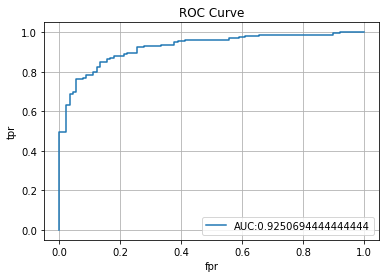

AUC ROC Score:  0.9250694444444444


In [9]:
def final_fun_2(X,Y):
    """
    This function includes entire pipeline, from data preprocessing to making final predictions.
    Input : raw data along with its target values
    Output: metric value that we are judging our model on
    """
    # Preprocessing
    preprocessed = preprocessing(X)
    # Standardize train features by removing the mean and scaling to unit variance.
    scaler = StandardScaler()
    X = scaler.fit_transform(preprocessed)
    X = pd.DataFrame(X)
    # Load the best model
    filename = "bestmodel.sav"
    modellist = pickle.load(open(filename, 'rb'))
    clf = modellist[1]
    pred = clf.predict(X) 
    score = roc_auc_score(Y, pred)
    # Plot ROC Curve
    fpr,tpr,thresholds = roc_curve(Y,pred)
    plt.plot(fpr,tpr,label="AUC:"+str(auc(fpr,tpr)))
    plt.title("ROC Curve")
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.grid()
    plt.legend()
    plt.show()
    return score
aucroc = final_fun_2(X,y)
print("AUC ROC Score: ",aucroc)

<b>Observations:</b>
<ol>
    1. We have taken the orignal dataset without adding any new features. <br>
    2. Our notebook consists of two functions final_fun_1 and final_fun_2. <br>
    3. Our Function-1 i.e., final_fun_1 includes entire pipeline, from data preprocessing to making final predictions. It is taking raw data (both, set of datapoints and a single datapoint) as an input and returning predictions for our input. <br>
    4. Our Function-2 i.e., final_fun_2 also includes entire pipeline, from data preprocessing to making final predictions. It is taking raw data as an input along with its target values and returning the metric value that we are judging our model on. <br>
    5. We are getting a good AUC ROC Score of 0.92 on the final dataset.
</ol>